In [26]:
import pandas as pd
import numpy as np
import datetime
import ipywidgets 
import matplotlib.pyplot as plt
import time
import numpy as np    



In [27]:
from ipywidgets import widgets
from IPython import display

In [28]:
data_dir = r"./transport/"

In [29]:
transport = pd.read_pickle(data_dir + r"transport.pkl")
temperatures = pd.read_pickle(data_dir + r"temperatures.pkl")

In [30]:
print('Number of unique transports: {}'.format(len(transport)))
print('Number of temperature measurements: {}'.format(len(temperatures)))

Number of unique transports: 3790
Number of temperature measurements: 233361


## Inspect Temperatures

In [31]:
temperatures.sample(5)

,TransportID,Time_raw,TemperatureInternal,TemperatureExternal,Time
187230,9114,Wed Dec 06 22:56:40 CET 2017,28.8,26.6,2017-12-06 21:56:40
79592,8307,Thu Feb 23 17:45:48 CET 2017,21.3,18.3,2017-02-23 16:45:48
193099,9121,Mon Dec 18 12:16:56 CET 2017,4.9,5.6,2017-12-18 11:16:56
14123,6750,Wed Apr 08 05:00:56 CEST 2015,2.6,1.8,2015-04-08 03:00:56
196096,9124,Sun Jan 14 22:03:43 CET 2018,19.4,18.0,2018-01-14 21:03:43


In [32]:
temperatures.describe().loc[['count', 'mean','min', 'max'],:]

,TransportID,TemperatureInternal,TemperatureExternal
count,233361.000000,231137.000000,227692.000000
mean,8406.541179,12.492027,13.813945
min,5559.000000,-23.000000,-27.500000
max,9351.000000,39.100000,59.700000


In [33]:
temperatures.describe().loc[['count'],:]/len(temperatures)

,TransportID,TemperatureInternal,TemperatureExternal
count,1.0,0.99047,0.975707


In [34]:
1- temperatures.Time.isnull().sum()/len(temperatures)

0.99046970144968527

In [35]:
temperatures.TemperatureInternal.apply(lambda x: np.isnan(x)).sum()

2224

#### Observations Temperature
More than 97% of temperatures and Times are valid values

Missing features:
- GPS data / location data

## Inspect Transport

In [98]:

transport.sample(30)

,TransportID,ContainerID,ContainerType,Forwarder,TruckingTimeStart,GroundHandler1,Airport1,GroundHandler2,Airport2,GroundHandler3,Airport3,GroundHandler4,Airport4,GroundHandler5,Airport5,TruckingTimeEnd,full_timestamp_flag
1552,7436,012-10000,1500CRT,Kanishk International,2016-11-03 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True
426,5985,000-10345,770C,NaN,2014-01-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-23 00:00:00,False
967,6849,000-10280,770C,Bischof,2015-08-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-06 00:00:00,False
3200,8774,011-10103,1500C,Shreepa Logistik PVT. LTD,2017-09-22 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-25 05:00:00,True
3596,9188,031-10021,31,Bischof,2018-01-23 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-24 10:00:00,True
832,6543,000-10295,770C,Fiege,2014-12-11 00:00:00,NaN,AMS,NaN,JED,NaN,NaN,NaN,NaN,NaN,NaN,NaT,False
2723,8370,000-10452,770C,1524,2017-06-03 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-03 01:00:00,True
1002,6882,000-10248,770C,Bischof,2015-07-15 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-15 06:00:00,True
1606,7483,000-10441,770C,Jet Trans Innsbruck,2016-03-31 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True
2264,7986,012-10023,1500CRT,Airpharm SA,2016-10-14 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-10-14 14:00:00,True


In [38]:
transport_countvalues = pd.DataFrame(transport.count()/len(transport))
# NB: NaN's are not counted. False is (Boolean)
print(transport_countvalues)

                            0
TransportID          1.000000
ContainerID          1.000000
ContainerType        1.000000
Forwarder            0.822164
TruckingTimeStart    1.000000
GroundHandler1       0.000528
Airport1             0.032454
GroundHandler2       0.000528
Airport2             0.032454
GroundHandler3       0.000000
Airport3             0.000000
GroundHandler4       0.000000
Airport4             0.000000
GroundHandler5       0.000000
Airport5             0.000000
TruckingTimeEnd      0.671240
full_timestamp_flag  1.000000


We always have TransportID, ContainerID and ContainerType, TruckingTimeStart. 

We mostly have a Forwarder (82%), and TruckingTimeEnd. We only occasionally have an Airport (and Airport1 and Airport2 just as often)

### Forwarders

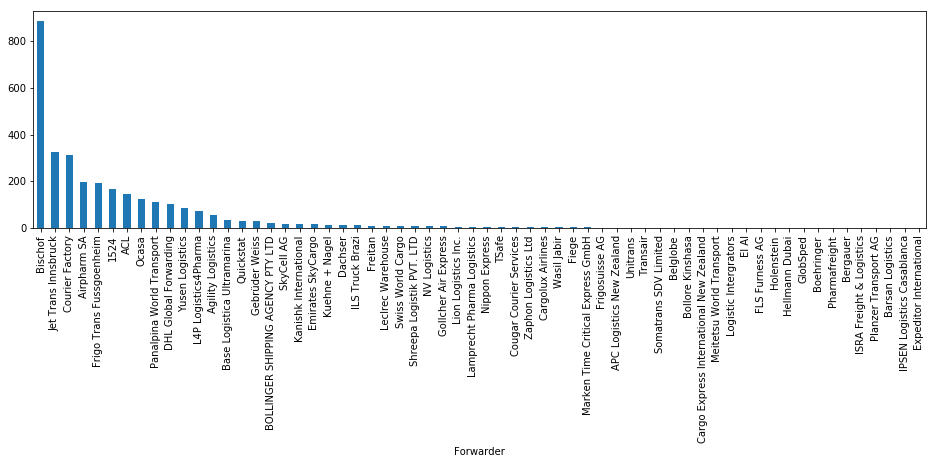

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(16,4))
transport.groupby('Forwarder').count()['TransportID'].sort_values(ascending=False).plot(kind='bar', ax=ax)
plt.show()

Bischof is by far the largest. 

### Container Types

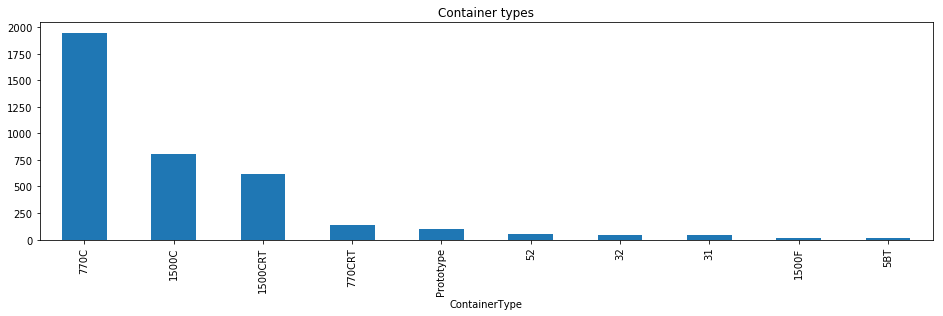

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(16,4))
transport.groupby('ContainerType').count()['TransportID'].sort_values(ascending=False).plot(kind='bar', ax=ax)
ax.set_title('Container types')
plt.show()

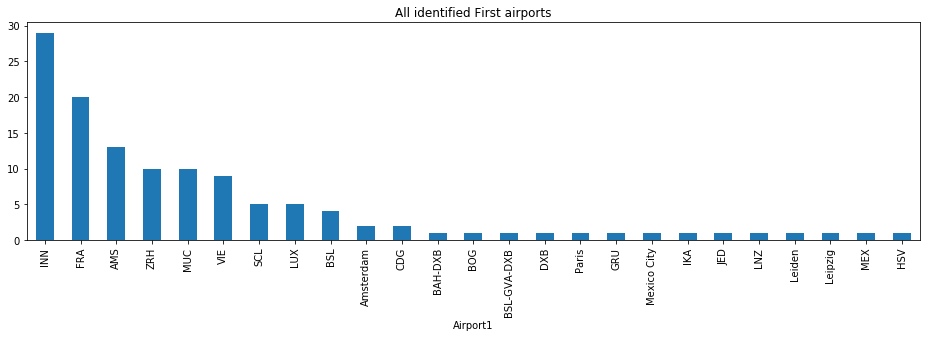

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(16,4))
transport.groupby('Airport1').count()['TransportID'].sort_values(ascending=False).plot(kind='bar', ax=ax)
ax.set_title('All identified First airports')
plt.show()

In [42]:
pd.crosstab(transport.Airport1, transport.Airport2)

Airport2,AKL,ALA,BOG,BOM,BSL,CAS,CSL,DXB,GRU,GVA,...,ORD,RUH,SCL,SIN,SVO2,SYD,Santiago de Chile,TPE,TYO,ZRH
Airport1,,,,,,,,,,,,,,,,,,,,,
AMS,0,0,1,0,0,2,1,0,0,0,...,0,0,2,0,0,0,0,0,0,0
Amsterdam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
BAH-DXB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
BOG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BSL,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
BSL-GVA-DXB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CDG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DXB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
FRA,3,0,1,0,0,0,0,0,0,0,...,0,2,0,2,3,0,0,0,1,0


Note: Some Airports are included under different names (Amsterdam, AMS)

In [43]:
valid_Airport1_idx = transport.Airport1.notnull()
transport.loc[valid_Airport1_idx, 'Airport2'].isnull().sum()


0

When Airport1 is given, Airport2 as well (both or neither)

In [142]:
more_than_0counts = temperatures.groupby('TransportID').count().Time >0
transport_ids_leq1 = more_than_0counts[more_than_0counts].index

In [143]:
transport_ids_leq1

Int64Index([6432, 6434, 6437, 6444, 6454, 6458, 6459, 6461, 6465, 6468,
            ...
            9325, 9327, 9329, 9331, 9332, 9333, 9339, 9344, 9346, 9351],
           dtype='int64', name='TransportID', length=789)

In [136]:
# A lot to improve:
# - create figure only once, replot the graph instead
# - filling of missing time values: what is wrong here?
# - Display of transport info in 2nd plot
# - Time Format

class TransportViewer(object):
    def __init__(self):
        ''' 
        
        '''

        #more_than_0counts = temperatures.groupby('TransportID').count().Time >0
        # transport_ids_leq1 = more_than_0counts[more_than_0counts].index)
        #transport_ids_endtime = transport.loc[transport.TruckingTimeEnd.notnull(), 'TransportID']
        #valid_idx = set(more_than_0counts + transport_ids_endtime)
        
        more_than_0counts = temperatures.groupby('TransportID').count().Time > 1
        more_than_0counts_idx = more_than_0counts[more_than_0counts].index
        more_than_0counts_transportID = list(more_than_0counts.index)
        # transport_ids_leq1 = more_than_0counts[more_than_0counts].index)
        transport_ids_endtime_transportID = list(transport.loc[transport.TruckingTimeEnd.notnull(), 
                                                               'TransportID'])
        self.transport_ids = set(more_than_0counts_transportID).intersection(transport_ids_endtime_transportID)
        self.transport_ids = more_than_0counts_transportID
        

    def launch(self):        
        self._create_transport_select_widget()
        # self._create_slicewidget()

    def _create_transport_select_widget(self):
        self._transportwgt=widgets.Dropdown(description='Transport ID',
                                            options=self.transport_ids) 
        display.display(self._transportwgt)
        self._transportwgt.observe(self.show_transport,
                                            names='value') # NB! names='value'. Listen only to value       
        
        
    def show_transport(self, btn):
        # plt.close('all')
        display.clear_output()
        display.display(self._transportwgt)

        self.fig, self.axs = plt.subplots(1, 2, figsize=(12, 5))

        self.axs[0].clear()
        self.transportid = int(self._transportwgt.value)

        print(self.transportid)
        #update the slicewidget max value
        selected_idx = temperatures.loc[:, 'TransportID']==self.transportid
        temps_tmp = temperatures.loc[selected_idx,:]
        temps_tmp.loc[:, 'Time'] = temps_tmp.loc[:, 'Time'].fillna(method='bfill') 
        #temps_tmp.loc[:, 'Time'] = temps_tmp.loc[:, 'Time'].fillna(method='ffill')
        try:
            temps_tmp.plot(x='Time', y=['TemperatureInternal','TemperatureExternal'], ax=self.axs[0])
            # self.axs[0].plot(x=temps_tmp.Time, y=temps_tmp.TemperatureInternal)
            
            plt.show()  
            # print(temps_tmp.head(2))
        except Exception as e:
            print(e)
        # print(temps_tmp)
        #plt.draw()

Dropdown(description='Transport ID', index=663, options=(5559, 5560, 5561, 5562, 5563, 5564, 5565, 5566, 5567, 5568, 5569, 5570, 5571, 5572, 5573, 5574, 5575, 5576, 5577, 5578, 5579, 5580, 5581, 5582, 5583, 5584, 5585, 5586, 5587, 5588, 5589, 5590, 5591, 5592, 5593, 5594, 5595, 5596, 5597, 5598, 5599, 5600, 5601, 5602, 5603, 5604, 5605, 5606, 5607, 5608, 5609, 5610, 5611, 5612, 5613, 5614, 5615, 5616, 5617, 5618, 5619, 5620, 5621, 5622, 5623, 5624, 5625, 5626, 5627, 5628, 5629, 5630, 5631, 5632, 5633, 5634, 5635, 5636, 5637, 5638, 5639, 5640, 5641, 5642, 5643, 5644, 5645, 5646, 5647, 5648, 5649, 5650, 5651, 5652, 5653, 5654, 5655, 5656, 5657, 5658, 5659, 5660, 5661, 5662, 5663, 5664, 5665, 5666, 5667, 5668, 5669, 5670, 5671, 5672, 5673, 5674, 5675, 5676, 5677, 5678, 5679, 5680, 5681, 5682, 5683, 5684, 5685, 5686, 5687, 5688, 5689, 5690, 5691, 5692, 5693, 5694, 5695, 5696, 5697, 5698, 5699, 5700, 5701, 5702, 5703, 5704, 5705, 5706, 5707, 5708, 5709, 5710, 5711, 5712, 5713, 5714, 5715, 5716, 5717, 5718, 5719, 5720, 5721, 5722, 5723, 5724, 5725, 5726, 5727, 5728, 5729, 5730, 5731, 5732, 5733, 5734, 5735, 5736, 5737, 5738, 5739, 5740, 5741, 5742, 5743, 5744, 5745, 5746, 5747, 5748, 5749, 5750, 5751, 5752, 5753, 5754, 5755, 5756, 5757, 5758, 5759, 5760, 5761, 5762, 5763, 5764, 5765, 5766, 5767, 5768, 5769, 5770, 5771, 5772, 5773, 5774, 5775, 5776, 5777, 5778, 5779, 5780, 5781, 5782, 5783, 5784, 5785, 5786, 5787, 5788, 5789, 5790, 5791, 5792, 5793, 5794, 5795, 5796, 5797, 5798, 5799, 5800, 5801, 5802, 5803, 5804, 5805, 5806, 5807, 5808, 5809, 5810, 5811, 5812, 5813, 5814, 5815, 5816, 5817, 5818, 5819, 5820, 5821, 5822, 5823, 5824, 5825, 5826, 5827, 5828, 5829, 5830, 5831, 5832, 5833, 5834, 5835, 5836, 5837, 5838, 5839, 5840, 5841, 5842, 5843, 5844, 5845, 5846, 5847, 5848, 5849, 5850, 5851, 5852, 5853, 5854, 5855, 5856, 5857, 5858, 5859, 5860, 5861, 5862, 5863, 5864, 5865, 5866, 5867, 5868, 5869, 5870, 5871, 5872, 5873, 5874, 5875, 5876, 5877, 5878, 5879, 5880, 5881, 5882, 5883, 5884, 5885, 5886, 5887, 5888, 5889, 5890, 5891, 5892, 5893, 5894, 5895, 5896, 5897, 5898, 5899, 5900, 5901, 5902, 5903, 5904, 5905, 5906, 5907, 5908, 5909, 5910, 5911, 5912, 5913, 5914, 5915, 5916, 5917, 5918, 5919, 5920, 5921, 5922, 5923, 5924, 5925, 5926, 5927, 5928, 5929, 5930, 5931, 5932, 5933, 5934, 5935, 5936, 5937, 5938, 5939, 5940, 5941, 5942, 5943, 5944, 5945, 5946, 5947, 5948, 5949, 5950, 5951, 5952, 5953, 5954, 5955, 5956, 5957, 5958, 5959, 5960, 5961, 5962, 5963, 5964, 5965, 5966, 5967, 5968, 5969, 5970, 5971, 5972, 5973, 5974, 5975, 5976, 5977, 5978, 5979, 5980, 5981, 5982, 5983, 5984, 5985, 5986, 5987, 5988, 5989, 5990, 5991, 5992, 5993, 5994, 5995, 5996, 5997, 5998, 5999, 6000, 6001, 6002, 6003, 6004, 6005, 6006, 6007, 6008, 6009, 6010, 6011, 6012, 6013, 6014, 6015, 6016, 6017, 6018, 6019, 6020, 6021, 6022, 6023, 6024, 6025, 6026, 6027, 6028, 6029, 6030, 6031, 6032, 6033, 6034, 6035, 6036, 6037, 6038, 6039, 6040, 6041, 6042, 6043, 6044, 6045, 6046, 6047, 6048, 6049, 6050, 6051, 6052, 6053, 6054, 6055, 6056, 6057, 6058, 6059, 6060, 6061, 6062, 6063, 6064, 6065, 6066, 6067, 6068, 6069, 6070, 6071, 6072, 6073, 6074, 6075, 6076, 6077, 6078, 6079, 6080, 6081, 6082, 6083, 6084, 6085, 6086, 6087, 6088, 6089, 6090, 6091, 6092, 6093, 6094, 6095, 6096, 6097, 6098, 6099, 6100, 6101, 6102, 6103, 6104, 6105, 6106, 6107, 6108, 6109, 6110, 6111, 6112, 6113, 6114, 6115, 6116, 6117, 6118, 6119, 6120, 6121, 6122, 6123, 6124, 6125, 6126, 6127, 6128, 6129, 6130, 6131, 6132, 6133, 6134, 6135, 6136, 6137, 6138, 6139, 6140, 6141, 6142, 6143, 6144, 6145, 6146, 6147, 6148, 6149, 6150, 6151, 6152, 6153, 6154, 6155, 6156, 6157, 6158, 6159, 6160, 6161, 6162, 6163, 6164, 6165, 6166, 6167, 6168, 6169, 6170, 6171, 6172, 6173, 6174, 6175, 6176, 6177, 6178, 6179, 6180, 6181, 6182, 6183, 6184, 6185, 6186, 6187, 6188, 6189, 6190, 6191, 6192, 6193, 6194, 6195, 6197, 6198, 6200, 6201, 6203, 6206, 6207, 6208, 6209, 6210, 6211, 6213, 6215, 6217, 6219, 6220, 6221, 6222, 6223, 6225, 6

6233
float() argument must be a string or a number, not 'NaTType'


/Users/ernstoldenhof/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


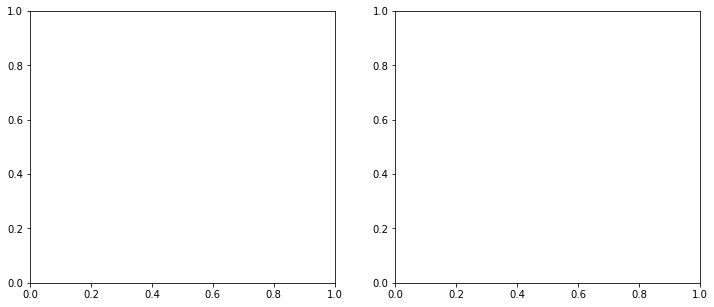

In [137]:
tp = TransportViewer()
tp.launch()